<a href="https://colab.research.google.com/github/thaohung13/Project.cuoi.ky.AI/blob/main/DETECT10FLOWER(88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [336]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [337]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/DATA2/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Hong'):
    output = 0
  if file.startswith('Su'):
    output = 1
  if file.startswith('Sen'):
    output = 2
  if file.startswith('Mai'):
    output = 3
  if file.startswith('PhongLuDo'):
    output = 4
  if file.startswith('HongMon'):
    output = 5
  if file.startswith('ThienDieu'):
    output = 6
  if file.startswith('CucVanTho'):
    output = 7
  if file.startswith('HuongDuong'):
    output = 8
  if file.startswith('DaUyenThao'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_PHOTOS1', photos)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_LABELS1', labels)

(1245, 128, 128, 3) (1245,)


In [453]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_PHOTOS1.npy')
labels = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/FL_LABELS1.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [454]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(512, kernel_size= (5,5), activation= 'relu', padding= 'same'))
model.add(Conv2D(512, kernel_size= (5,5), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((4,4), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_523 (Conv2D)         (None, 128, 128, 8)       224       
                                                                 
 conv2d_524 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 max_pooling2d_263 (MaxPooli  (None, 64, 64, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_525 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 conv2d_526 (Conv2D)         (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_264 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                               

In [420]:
x_train.shape

(996, 128, 128, 3)

In [421]:
y_train.shape

(996, 10)

In [455]:
# Training
batch_size= 16
epochs= 80   

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)
eval = model.evaluate(x_test, y_test)
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Epoch 1/80
63/63 [==============================] - 4s 32ms/step - loss: 2.4014 - accuracy: 0.2490
Epoch 2/80
63/63 [==============================] - 2s 27ms/step - loss: 1.8444 - accuracy: 0.2992
Epoch 3/80
63/63 [==============================] - 2s 26ms/step - loss: 1.6363 - accuracy: 0.3404
Epoch 4/80
63/63 [==============================] - 2s 26ms/step - loss: 1.4911 - accuracy: 0.4147
Epoch 5/80
63/63 [==============================] - 2s 26ms/step - loss: 1.3307 - accuracy: 0.4940
Epoch 6/80
63/63 [==============================] - 2s 27ms/step - loss: 1.1728 - accuracy: 0.5653
Epoch 7/80
63/63 [==============================] - 2s 26ms/step - loss: 1.0047 - accuracy: 0.6265
Epoch 8/80
63/63 [==============================] - 2s 27ms/step - loss: 0.8517 - accuracy: 0.7048
Epoch 9/80
63/63 [==============================] - 2s 28ms/step - loss: 0.6759 - accuracy: 0.7530
Epoch 10/80
63/63 [==============================] - 2s 27ms/step - loss: 0.5331 - accuracy: 0.8002
Epoch 11/

In [456]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

8/8 [==============================] - 0s 19ms/step - loss: 1.3394 - accuracy: 0.8835
Accuracy: 0.8835341334342957
Loss: 1.3393728733062744


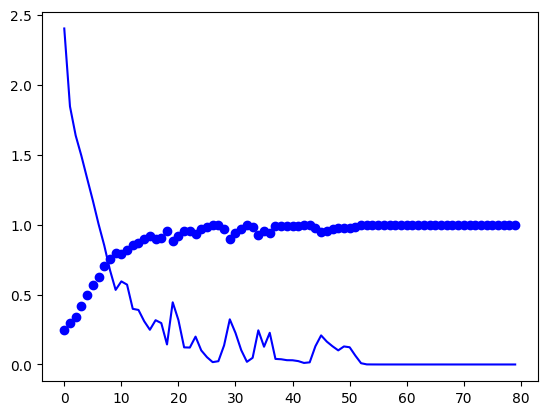

In [457]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [458]:
#Save model
model.save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/file model/MODEL3.h5')